### This will be in the prepare module
    _Check for and remove duplicates by customer_id. - None
    
    _Remove redundant columns: payment_type_id, internet_service_type_id, contract_type_id, & customer_id. - Completed
        -Used the following to drop redundant columns
        -df = df.drop(['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'], axis = 1)
        -df.head(2)
    
    _Encode payment_type(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)), internet_service_type(DSL, Fiber, None), contract_type(Month-to-month, One year, Two year), gender(male/female), partner(yes/no), multiple_line(yes/no), device_protection(yes/no), tech_support(yes/no), streaming_tv(yes/no), streaming_movies(yes/no), paperless_billing, & churn (yes/no).
    - gender is male(1) or not male(0)
    - yes(1) no(0)
    - payment, contract and service types (True = 1) (Fales = 0)
    
    _Check for nulls and fill (Fill in total_charges' blanks with 0). - Completed
        -#find empty values. Tried isna, isnull, notna, notnull but did not shown any matches.
            -df.eq(' ').sum()
        -Used .replace to empty values with a 0 in total charges.
            -df = df.replace({'total_charges': ' '}, 0)
            -df.head()

    _Convert total_charges to float64. - Completed
        -#convert 'total_charges' to float and validate change.
        - df['total_charges'] = df['total_charges'].astype(float)
        - df.dtypes
    
    _Replace 'No phone service' & 'No internet service' with 'No'. - Completed
        -df.replace(to_replace = 'No internet service', value = 'No')
        -df.replace(to_replace = 'No phone service', value = 'No')

In [1]:
#libraries
import get_db
import explore
import prepare
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import graphviz
from graphviz import Graph
from explore import get_metrics_bin

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Plan
    Goal: Identify feature(s) that cause the greatest churn.
    
    Churn rate is 26.5% (1869) of 7043 customers.
    
    Taking you through the data pipeline I will begin with acquiring the telcor data from the get_db.py module, prepare it using the prepare.py module, split the data and on through exploration. Using explore.py module I identified a set of features used to develop my initial hypothesis. Once cleaned I ran it through multivariate to compare features to help with testing the listed inital hypothesis. Each exploration will include takeaways that have led to preparing, cleaning and testing of the data resulting in either rejecting or failing to reject the final hypothesis.
    
    Features within my hypothesis have been split, tested and modeled in order to provide a recommendation on the final hypothesis in order to reduce churn rates based rejected or failed to reject of the hypothesis. 
    
    I have also identified unknown variables that at a later time can be researched, developed and tested using this model to predict future churn.
    
    I will split my dataframe using train, validate and test.
    
    To explore the data using Univariate, Bivariate and Multivariate methods.
    
    In testing my hypothesis I'll be using chi2, pearsonr, and ttest methods.
    
    For modeling I'll be using DecisionTreeClassifier, RandomForrestClassifier, KNeighborsClassifier, and Logistics Regression.
    
    My methodology followis the data pipeline; plan, acauire, prepare, explore, model and deliver.

    My hypothesis are listed below:
    
    1. Churn is dependent of whether or not customers are on fiber. (chi2)
        * Null: Churn is independent of whether or not a customer are on fiber.
        * Alternate: churn is dependent of whether or not customers are on fiber.               
    
    2. Tenure and monthly charges are linearly correlated. (pearsonr)
        * Null: Tenure and monthly charges are not linearly correlated.
        * Alternate: Tenure and monthly charges are linearly correlated.
                
    3. Churn is dependent younger customers. (chi2)
        * Null: Churn is independent of younger customers.
        * Alternate: Churn is dependent of younger customers.
        
    4. Do you younger customers pay more then the older customers. (ttest 1samp)
        * Null: The average monthly charges for younger customers is no different than the population.
        * Alternate: The average monthly charges for younger customers are different than the population.
            
    5. Do younger customers churn more than older customers? (ttest 1samp)
        * Null: Younger customer churn is no different than the older population.
        * Alternate: Younger customer churn is different than the older population.
    
    6. Do single customers churn more than non single customers?  (ttest 1samp)
        * Null: Single customer churn is no different than the non single population.
        * Alternate: Single customer churn is different than the non single population.
    
    7. Is churn dependent on autopayment? (chi2)
        * Null: Churn is independent of whether or not customes are enrolled in the autopayment plan.
        * Alternate: Churn is dependent of whether or not customes are enrolled in the autopayment plan.
            
    8. Is churn dependent on phone_service? (chi2)
        * Null: Churn is independent on phone services.
        * Alternate: Churn is dependent on phone services.
            
    FINAL HYPOTHESIS:

    Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled in a autopayment plan are more likely to churn than those customers that do not fall in this category. (ttest 1samp)
        * Null: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.
        * Alternate: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan is different than the rest of the population.
        
    Statisitical Test:
        1. chi2
        2. pearsonr
        3. ttest
        
    Exploration:
        1. Univariate
        2. Bivariate
        3. Multivariate

    Modeling:
        1. Decision Tree
        2. Random Forrest
        3. KNN
        4. Logistics Regression
        
    Conclusion
        In conclusion, we ran through the data pipeline, identified our initial hypothesis, split, tested and modeled our features that resulted in the following recommendations.
        1.
        2.
        3.

# *Working code for project*

# Acquire

In [2]:
df = get_db.get_telco_data()

#### Initial visualization

##### TAKEAWAYS 

    -Related services:
        *multiple_services relates to phone_services
        *online_security, online_backup, device_protection, tech_support, streaming_tv, and streaming_movies relate to internet services. 

# Prepare

    The prepare.py file is broke up by sections to identify at which stage of the pipeline that I decided to edit, alter, modify or delete colums, column names, data types, etc...and are identifed by notes within the code.
    * Initial clean up was done just after initial visualization of raw data.
    * All other decisions to modify the dataframe are annotated within the prepare.py module.

In [3]:
df = prepare.clean_data(df)

# Split data into train, validate, and test samples.
    The resulting dataframes are 3 samples:
    
        1. A dataframe for training the algorithms.
            * The train dataset is for training our models. We also perform our exploratory data analysis on train.
            
        2. A dataframe for validating the models developed on unseen data.
            * First, it is an "out of sample" dataset so that we can evaluate our models on unseen data to measure how well the model generalizes.
            * Second, the validate set allows us to fine tune our hyperparameters.
            
        3. A dataframe for testing the best performing model to ensure the model is able to be generalized on a final set of unseen data not 'overfitting' train, a validate and a test, roughly a 70%:20%:10% split.
            * Final out of sample dataset used to evaluate how well the models tuned on validate generalize on unseen data.

In [4]:
train, validate, test = prepare.train_validate_test_split(df, 'churned')

# Exploratory
    1. Discover features, using  that have the largest impact on the target variable to discover patterns, spot anomalies, test hypotheses and check assumptions.
        *The dataframe resulting from these functions should are ready to be used in modeling.
        *Attributes are reduced to features, features are in a numeric form, there are no missing values, and continuous and/or ordered values are scaled to be unitless.
        
    2. Hypothesize: Form and documented initial hypothises about how the predictors (independent variables, features, or attributes) interact with the target (y-value or dependent variable).
    
    3. Used visualization techniques to identify drivers and follow up with a statistical test.
    
    4. Test Hypothesis (t-tests, correlation, chi-square)

## Univariate Stats
    1. Descriptive stats, frequencies, histograms.    
        * Explore the target variable.
        * Explore the categorical/qualitative variables.
        * Explore the continuous/quantitative variables.

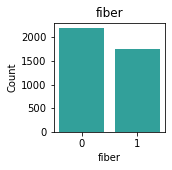

   fiber  Count  Percent
0      0   2191    55.57
1      1   1752    44.43
_________________________________________________________________


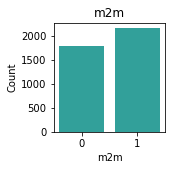

   m2m  Count  Percent
1    1   2160    54.78
0    0   1783    45.22
_________________________________________________________________


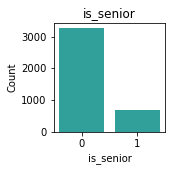

   is_senior  Count  Percent
0          0   3261     82.7
1          1    682     17.3
_________________________________________________________________


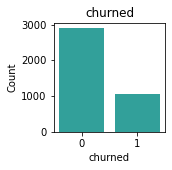

   churned  Count  Percent
0        0   2897    73.47
1        1   1046    26.53
_________________________________________________________________


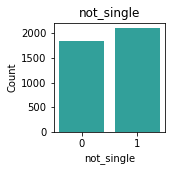

   not_single  Count  Percent
1           1   2098    53.21
0           0   1845    46.79
_________________________________________________________________


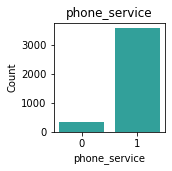

   phone_service  Count  Percent
1              1   3584     90.9
0              0    359      9.1
_________________________________________________________________


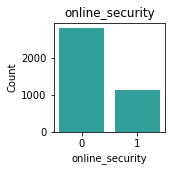

   online_security  Count  Percent
0                0   2812    71.32
1                1   1131    28.68
_________________________________________________________________


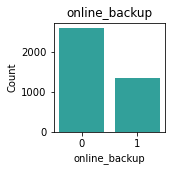

   online_backup  Count  Percent
0              0   2600    65.94
1              1   1343    34.06
_________________________________________________________________


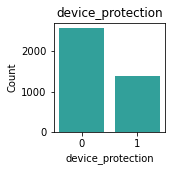

   device_protection  Count  Percent
0                  0   2568    65.13
1                  1   1375    34.87
_________________________________________________________________


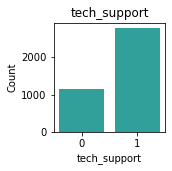

   tech_support  Count  Percent
0             1   2779    70.48
1             0   1164    29.52
_________________________________________________________________


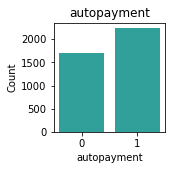

   autopayment  Count  Percent
0            1   2240    56.81
1            0   1703    43.19
_________________________________________________________________


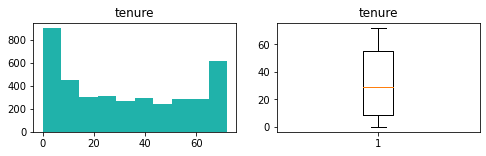

count    3943.000000
mean       32.324372
std        24.569279
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


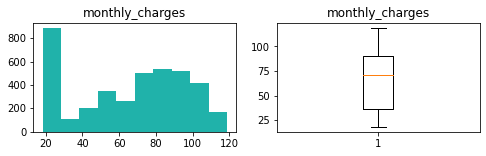

count    3943.000000
mean       65.150710
std        30.030427
min        18.250000
25%        36.475000
50%        70.700000
75%        89.950000
max       118.750000
Name: monthly_charges, dtype: float64


In [5]:
#list all categorical variables and quatintative variables for exploration within the train df.
cat_vars = ['fiber', 'm2m', 'is_senior', 'churned', 'not_single', 'phone_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'autopayment']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_univariate(train, cat_vars, quant_vars)

##### TAKEAWAYS
    8/28/2021
    Of the TRAIN data (Initial discovery):
    - 44.43% (1752) of customers are on fiber
    - 54.78% (2160) of customers are m2m 
    - 82.7% (3261) of customers are not senior
    - 26.53% (1046) of customers churned
    - 46.79% (1845) of customers are not single
    - is_male is an even distribution. DROPPED this column.
    - Customers with a 'partner' similarly divided (47.6 & 52.6 respectively)
    - Customers with 'dependents' account for 70.1%
    - Customers with 'phone_service_ account' for 91%
    - autopayment accounts for 56.81% (2240) of customers 43.19% (1703) are not on autopayment.
    - phone and internet services will be used at a later time.
    - average tenure 32.32%
    - average monthly_charges 65.15%
    
    -Initial assessment during prepare stage of the pipeline.
        - m2m - 2160 or 55%, 1 year - 811 or 21%, 2 year - 972 or 24%
            *change contract type to m2m (yes or no) and drop one and two year contracts.
            *assumption is that if it is not m2m plan all others are on a contract.
        - payment type - change to autopayment and drop 'credit_card', 'bank_transfer', check' and 'e_check'
        -interent type:
            *change internet type to fiber (Yes or No).
            *Because there was only 61 customers with no internet that churned as validated in the Bivariate stats below.
            *assumption, based on hypothesis, is that a customer is on fiber or not on fiber. 

# Initial Hypothesis Testing

In [6]:
alpha = .05

#####    1. Churn is dependent of whether or not customers are on fiber. (chi2)
        * Null: Churn is independent of whether or not a customer are on fiber.
        * Alternate: churn is dependent of whether or not customers are on fiber.               


In [7]:
Null = 'Churn is independent of whether or not a customer are on fiber.'
Alternate = 'Churn is dependent of whether or not customers are on fiber.'

observed = pd.crosstab(train.churned, train['fiber'])
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)
print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')


Observed

[[1873 1024]
 [ 318  728]]

Expected

[[1609.77098656 1287.22901344]
 [ 581.22901344  464.77098656]]


chi^2 = 363.7808
p     = 0.0000


We reject the null and accept the alternate: Churn is dependent of whether or not customers are on fiber.


##### 2. Tenure and monthly charges are linearly correlated. (pearsonr)
        * Null: Tenure and monthly charges are not linearly correlated.
        * Alternate: Tenure and monthly charges are linearly correlated.

In [11]:
Null = 'Tenure and monthly charges are not linearly correlated.'
Alternate = 'Tenure and monthly charges are linearly correlated.'

corr, p = stats.pearsonr(train.tenure, train.monthly_charges)

print(f'chi^2 = {corr:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

chi^2 = 0.2447
p     = 0.0000


We reject the null and accept the alternate: Tenure and monthly charges are linearly correlated.


##### 3. Churn is dependent younger customers. (chi2)
        * Null: Churn is independent of younger customers.
        * Alternate: Churn is dependent of younger customers.

In [9]:
Null = 'Churn is independent of younger customers.'
Alternate = 'Churn is dependent of younger customers.'

observed = pd.crosstab(train.churned, train['is_senior'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)
print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[2496  401]
 [ 765  281]]

Expected

[[2395.92112605  501.07887395]
 [ 865.07887395  180.92112605]]


chi^2 = 90.1985
p     = 0.0000


We reject the null and accept the alternate: Churn is dependent of younger customers.


##### 4. Do you younger customers pay more then the older customers? (ttest 1samp)
        * Null: The average monthly charges for younger customers is no different than the population (monthly_charges_mean)
        * Alternate: The average monthly charges for younger customers are different than rest of the population.

In [12]:
Null = 'The average monthly charges for younger customers is no different than the population.'
Alternate = 'The average monthly charges for younger customers are different than the population.'

older_monthly_charges = df[df.is_senior == 0].monthly_charges
monthly_charges_mean = df.monthly_charges.mean()

test_results = stats.ttest_1samp(older_monthly_charges, monthly_charges_mean)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We reject the null and accept the alternate: The average monthly charges for younger customers are different than the population.


##### 5. Do younger customers churn more than older customers? (ttest 1samp)
        * Null: Younger customer churn is no different than the older population.
        * Alternate: Younger customer churn is different than the older population.

In [13]:
Null = 'Younger customer churn is no different than the older population.'
Alternate = 'Younger customer churn is different than the older population.'
            
older_churn = df[df.is_senior == 0].churned
churn_mean = df.churned.mean()

test_results = stats.ttest_1samp(older_churn, churn_mean)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We reject the null and accept the alternate: Younger customer churn is different than the older population.


##### 6. Do single customers churn more than non single customers?  (ttest 1samp)
        * Null: Single customer churn is no different than the non single population.
        * Alternate: Single customer churn is different than the non single population.

In [14]:
Null = 'Single customer churn is no different than the non single population.'
Alternate = 'Single customer churn is different than the non single population.'
            
single = df[df.not_single == 0].churned
non_single = df.churned.mean()

test_results = stats.ttest_1samp(single, non_single)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We reject the null and accept the alternate: Single customer churn is different than the non single population.


##### 7. Is churn dependent on autopayment? (chi2)
        * Null: Churn is independent of whether or not customes are enrolled in the autopayment plan.
        * Alternate: Churn is dependent of whether or not customes are enrolled in the autopayment plan.

In [16]:
Null = 'Churn is independent of whether or not customes are enrolled in the autopayment plan.'
Alternate = 'Churn is dependent of whether or not customes are enrolled in the autopayment plan.'
            
observed = pd.crosstab(train.churned, train['autopayment'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)

print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[1460 1437]
 [ 780  266]]

Expected

[[1645.77225463 1251.22774537]
 [ 594.22774537  451.77225463]]


chi^2 = 182.0364
p     = 0.0000


We reject the null and accept the alternate: Churn is dependent of whether or not customes are enrolled in the autopayment plan.


##### 8. Is churn dependent on phone_service? (chi2)
        * Null: Churn is independent on phone services.
        * Alternate: Churn is dependent on phone services.

In [17]:
Null = 'Churn is independent on phone services.'
Alternate = 'Churn is dependent on phone services.'
            
observed = pd.crosstab(train.churned, train['phone_service'])
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('\nExpected\n')
print(expected)

print('\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

print('\n')
if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

Observed

[[ 264 2633]
 [  95  951]]

Expected

[[ 263.76439259 2633.23560741]
 [  95.23560741  950.76439259]]


chi^2 = 0.0011
p     = 0.9736


We fail to reject the null and accept the null: Churn is independent on phone services.


# Final Hypothesis

##### Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled in a autopayment plan are more likely to churn than those customers that do not fall in this category. (ttest 1samp)
        * Null: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.
        * Alternate: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan is different than the rest of the population.

In [18]:
Null = 'Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.'
Alternate = 'Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan is different than the rest of the population.'
            
customer = train[(train.is_senior == 0) & (train.not_single == 0) & (train.fiber == 1) & (train.m2m == 1) & 
                 (train.phone_service == 1) & (train.autopayment == 0)]
customer_churn = customer.churned
churn = train.churned.mean()

test_results = stats.ttest_1samp(customer_churn, churn)

if p < alpha:
    print(f'We reject the null and accept the alternate: {Alternate}')
else:
    print(f'We fail to reject the null and accept the null: {Null}')

We fail to reject the null and accept the null: Customers who are young, single, on fiber, has phone service, on m2m, and not enrolled on the autopayment plan are no different than the rest of the population.


## Bivariate Stats
    1. Plot the interaction of each variable with the target. 
    2. Document takeaways.
    3. Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.

fiber 
_____________________

         chi2       p-value  degrees of freedom
0  363.780774  4.230027e-81                   1

observed:
 churned     0     1   All
fiber                    
0        1873   318  2191
1        1024   728  1752
All      2897  1046  3943

expected:
              0           1
0  1609.770987  581.229013
1  1287.229013  464.770987


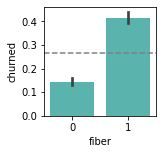


_____________________

m2m 
_____________________

         chi2        p-value  degrees of freedom
0  663.836694  2.187516e-146                   1

observed:
 churned     0     1   All
m2m                      
0        1666   117  1783
1        1231   929  2160
All      2897  1046  3943

expected:
              0           1
0  1310.005326  472.994674
1  1586.994674  573.005326


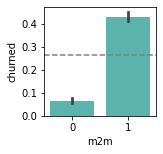


_____________________

is_senior 
_____________________

        chi2       p-value  degrees of freedom
0  90.198518  2.154234e-21                   1

observed:
 churned       0     1   All
is_senior                  
0          2496   765  3261
1           401   281   682
All        2897  1046  3943

expected:
              0           1
0  2395.921126  865.078874
1   501.078874  180.921126


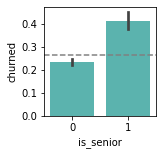


_____________________

not_single 
_____________________

         chi2       p-value  degrees of freedom
0  119.257438  9.198254e-28                   1

observed:
 churned        0     1   All
not_single                  
0           1204   641  1845
1           1693   405  2098
All         2897  1046  3943

expected:
              0           1
0  1355.557951  489.442049
1  1541.442049  556.557951


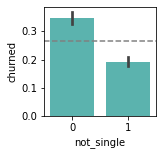


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.001099  0.973553                   1

observed:
 churned           0     1   All
phone_service                  
0               264    95   359
1              2633   951  3584
All            2897  1046  3943

expected:
              0           1
0   263.764393   95.235607
1  2633.235607  950.764393


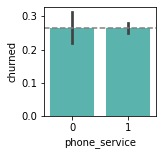


_____________________

autopayment 
_____________________

         chi2       p-value  degrees of freedom
0  182.036408  1.741018e-41                   1

observed:
 churned         0     1   All
autopayment                  
0            1460   780  2240
1            1437   266  1703
All          2897  1046  3943

expected:
              0           1
0  1645.772255  594.227745
1  1251.227745  451.772255


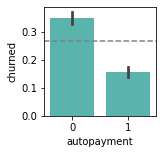


_____________________

tenure 
____________________



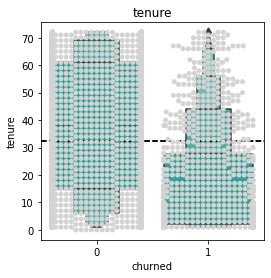

          count       mean        std  min   25%   50%    75%   max
churned                                                            
0        2897.0  37.733517  24.071015  0.0  15.0  38.0  61.00  72.0
1        1046.0  17.343212  19.121415  1.0   2.0   9.0  27.75  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2271196.5, pvalue=5.796579997877841e-127)

____________________

monthly_charges 
____________________



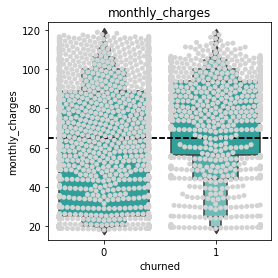

          count       mean        std    min      25%    50%    75%     max
churned                                                                    
0        2897.0  61.850846  31.160324  18.25  25.2000  65.25  89.10  118.75
1        1046.0  74.290010  24.439527  18.95  56.3125  79.55  93.85  118.35 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1176266.5, pvalue=6.775715811014378e-27)

____________________



In [19]:
#variables related to hypothesis testing
cat_vars = ['fiber', 'm2m', 'is_senior', 'not_single', 'phone_service','autopayment']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_bivariate(train, 'churned', cat_vars, quant_vars)

##### TAKEAWAYS
    8/28/2021
    - On ALL TRAINED data (ran bivariate on all trained data to identify other patterns and anomalies):
    - Number of fiber (728)  customers who churned.
       * what is about our fiber internet service is making customers churn?
       * Less people churn on DSL (257) then on fiber...possible validation that fiber service needs work.
       * DROP no_internet. Only 61 customers who do not have internet churn.

    - DRAFT hypothesis. (NOTE: Initial hypothesis may differ)
    * HYPOTHESIS: Customers on fiber are more likely to churn than those customers not on fiber. 
        ****Convert fiber and DSL into one column - fiber (Yes or No) and encode.

    - 90.5% (929/1231) of customers in the first month churn than any other month
    * HYPOTHESIS: Customers are more than likely to churn in the first month of service than any other customer.
        
    - senior_citizen:
    * HYPOTHESIS: Customers who are NOT senior citizens (765) are more likely to churn than senior citizens (281).
    * In exploration 'senior_citizen' is changed to 'is_senior' to test whether or not younger customers churn.
    
    - Between 'partner' and 'dependents' less single (no_d_863-no_p_687=176) customers churn then not single people (p_359 + d_183 = 542).
    * IN exploration this is changed to 'is_single' to test whether or not single people churn at a higher rate then those customers that are not single.
    
    - Phone service:
    * HYPOTHESIS: Customers with phone_service (951) are more likely to churn than those that do not have phone_service?
        ***DROP multiple_lines. It is evenly weighed and does not have an impact on phone_services.
            
    - Interent services:
        ***DROP streaming services. Streaming services are eveningly weighed and will not affect intenert services and churn.
        
    - Payment type:
    * Converted payment type to autopayment (Yes or No). Assumption is that customers are either on or not on an autopayment plan.can I call you
    * HYPOTHESIS: Customers enrolled in automatic payment plan (266) are less likely to churn than those customers NOT enrolled in the automatic payment plan (780).

    - Lower tenure more churn.
    
    - Higher monthly payments more churn.
   
    - Contract type:
    * Combine  m2m, 1, and 2 year contracts to a single column titled 'm2m' and encode.
    * HYPOTHESIS: m2m churn is greater than those customers not on m2m plan.
        ---------------------------------------------
    QUESTIONS:
        1. Why do customers on fiber churn more?
        2. Why do customers churn more in the first month than any other month?
        3. Why do non single customers (with partner or dependents) churn more then single customers?
        4. Why do younger customers churn more than older customers?
        5. Why do customers on m2m plans churn more than those customers on contracts?
        6. Why do customers enrolled in autopayments churn less than those customers not enrolled in an autopayment?
        7. Why do customers churn more with phone services?
        
        * What do these questions all have in common?
       ** What is the cost per month of a younger customers who is not single, has phone services and fiber, on a m2m plan, enrolled in an autopayment plan?
       
- FINAL HYPOTHESIS: Customers who are young, not single, on fiber, has phone service, on m2m, and not enrolled in a autopayment plan are more likely to churn than those customers that do not fall in this category.

## Multivariate Stats
    1. How subgroups compare to each-other and to the overall population. 
    2. Answer questions using visualizations and/or hypothesis testing.

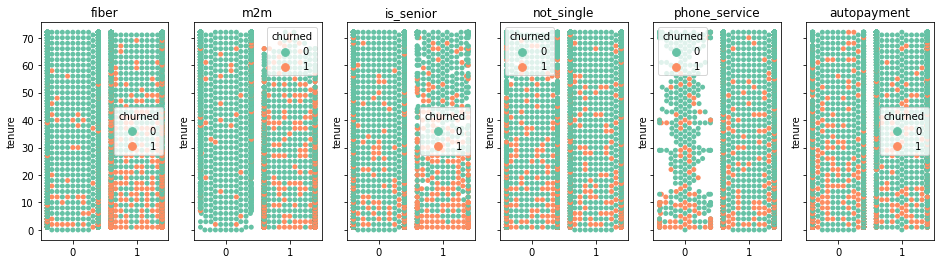

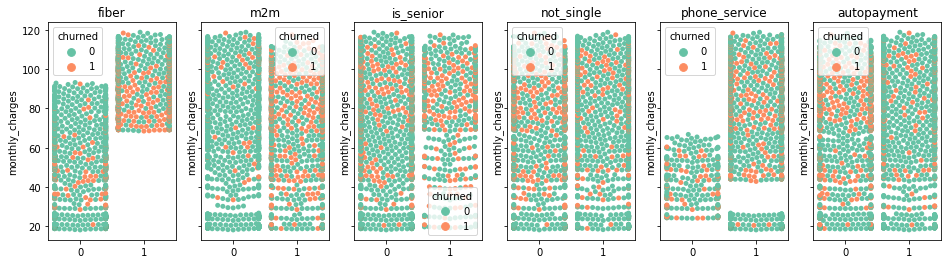

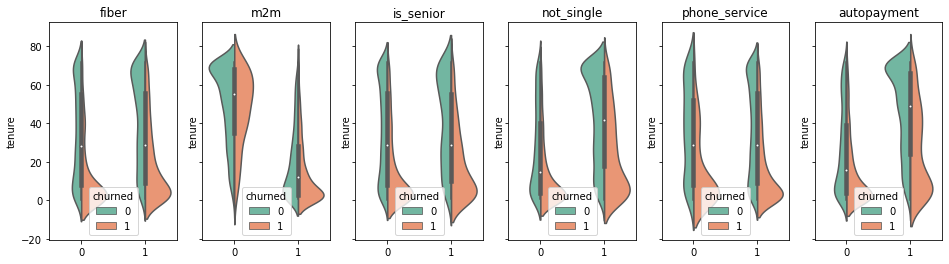

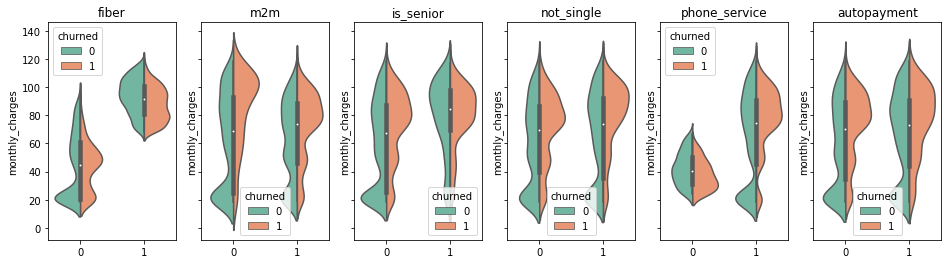

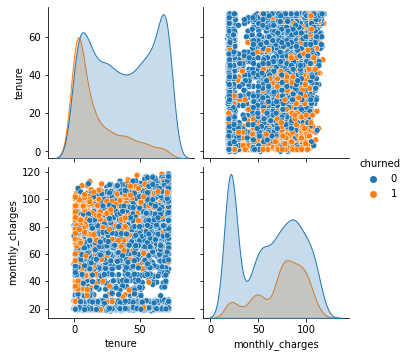

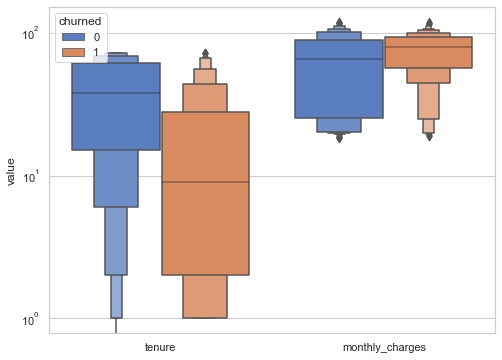

In [20]:
#uses variables from bivariate
target = 'churned'
explore.explore_multivariate(train, target, cat_vars, quant_vars)

##### TAKEAWAYS

# Train, Validate, Test

In [21]:
#create the X & y variables fot train, validate and test. 
X_train = train[['fiber', 'm2m', 'is_senior', 'not_single', 'phone_service','autopayment']]#features
y_train = train.churned#target

X_validate = validate[['fiber', 'm2m', 'is_senior', 'not_single', 'phone_service','autopayment']]
y_validate = validate.churned

X_test = test[['fiber', 'm2m', 'is_senior', 'not_single', 'phone_service','autopayment']]
y_test = test.churned

In [22]:
#print of x, y variables shape. In the validate model x, y shape needs to be transposed.
print(X_train.shape,y_train.shape)
print(X_validate.shape,y_validate.shape)
print(X_test.shape,y_test.shape)

(3943, 6) (3943,)
(1691, 6) (1691,)
(1409, 6) (1409,)


# Baseline

In [23]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


# Modeling

## Decision Tree

In [24]:
#Create the model
model = DecisionTreeClassifier(max_depth=5, random_state=123)
#Fit the model
model = model.fit(X_train, y_train)
#Use the model
y_predictions = model.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(model, X_train, y_train)


    The accuracy for our model is 0.7783
    The True Positive Rate is 0.507, The False Positive Rate is 0.124,
    The True Negative Rate is 0.876, and the False Negative Rate is 0.493
    


,precision,recall,f1-score,support
0,0.831097,0.876424,0.853159,2897.000000
1,0.596847,0.506692,0.548087,1046.000000
accuracy,0.778341,0.778341,0.778341,0.778341
macro avg,0.713972,0.691558,0.700623,3943.000000
weighted avg,0.768955,0.778341,0.772229,3943.000000


## Random Forrest

In [25]:
#Create the Model
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=1, n_estimators=100,
max_depth=5, random_state=123)
#Fit the Model
rf.fit(X_train, y_train)
#Use the Model
y_pred = rf.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(rf, X_train, y_train)


    The accuracy for our model is 0.7791
    The True Positive Rate is 0.519, The False Positive Rate is 0.127,
    The True Negative Rate is 0.873, and the False Negative Rate is 0.481
    


,precision,recall,f1-score,support
0,0.834103,0.872972,0.853095,2897.000000
1,0.596048,0.519120,0.554931,1046.000000
accuracy,0.779102,0.779102,0.779102,0.779102
macro avg,0.715076,0.696046,0.704013,3943.000000
weighted avg,0.770952,0.779102,0.773998,3943.000000


## KNN

In [26]:
#Create the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
#Fit the model
knn.fit(X_train, y_train)
#Use the model
y_pred = knn.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(knn, X_train, y_train)


    The accuracy for our model is 0.773
    The True Positive Rate is 0.458, The False Positive Rate is 0.113,
    The True Negative Rate is 0.887, and the False Negative Rate is 0.542
    


,precision,recall,f1-score,support
0,0.819196,0.886779,0.851649,2897.000000
1,0.593556,0.457935,0.516999,1046.000000
accuracy,0.773015,0.773015,0.773015,0.773015
macro avg,0.706376,0.672357,0.684324,3943.000000
weighted avg,0.759339,0.773015,0.762873,3943.000000


## LogRegression

In [27]:
#Create the model
log_reg = LogisticRegression(C=1, random_state=123, intercept_scaling=1, solver='lbfgs')
#Fit the model
log_reg.fit(X_train, y_train)
#Use the model
y_pred = log_reg.predict(X_train)

#prediction, accuracy, & class report evaluations
get_metrics_bin(log_reg, X_train, y_train)


    The accuracy for our model is 0.7776
    The True Positive Rate is 0.529, The False Positive Rate is 0.133,
    The True Negative Rate is 0.867, and the False Negative Rate is 0.471
    


,precision,recall,f1-score,support
0,0.835995,0.867449,0.851431,2897.000000
1,0.590181,0.528681,0.557741,1046.000000
accuracy,0.777581,0.777581,0.777581,0.777581
macro avg,0.713088,0.698065,0.704586,3943.000000
weighted avg,0.770785,0.777581,0.773521,3943.000000


# Random Forrest model Validation

In [29]:
#the following code was created to transpose the X shape. Without it the validate model prints an error on the shape.
X_validate=X_validate.transpose()

#Create the Model
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=1, n_estimators=100,
max_depth=5, random_state=123)
#Fit the Model
rf.fit(X_validate, y_validate)
#Use the Model
y_pred = rf.predict(X_validate)

#prediction, accuracy, & class report evaluations
get_metrics_bin(rf, X_validate, y_validate)


    The accuracy for our model is 0.7688
    The True Positive Rate is 0.514, The False Positive Rate is 0.139,
    The True Negative Rate is 0.861, and the False Negative Rate is 0.486
    


,precision,recall,f1-score,support
0,0.830614,0.860709,0.845393,1242.000000
1,0.571782,0.514477,0.541618,449.000000
accuracy,0.768776,0.768776,0.768776,0.768776
macro avg,0.701198,0.687593,0.693506,1691.000000
weighted avg,0.761888,0.768776,0.764734,1691.000000


# Random Forrest model Testing

In [30]:
#Create the Model
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=1, n_estimators=100,
max_depth=5, random_state=123)
#Fit the Model
rf.fit(X_test, y_test)
#Use the Model
y_pred = rf.predict(X_test)

#prediction, accuracy, & class report evaluations
get_metrics_bin(rf, X_test, y_test)


    The accuracy for our model is 0.7878
    The True Positive Rate is 0.449, The False Positive Rate is 0.0899,
    The True Negative Rate is 0.91, and the False Negative Rate is 0.551
    


,precision,recall,f1-score,support
0,0.820557,0.910145,0.863033,1035.000000
1,0.643678,0.449198,0.529134,374.000000
accuracy,0.787793,0.787793,0.787793,0.787793
macro avg,0.732118,0.679671,0.696083,1409.000000
weighted avg,0.773607,0.787793,0.774404,1409.000000


# Delivery

In [32]:
telco_customer = pd.concat([train.X_train, train.X_validate, train.X_test], axis= 1)

model_pred = rf.predict(telco_customer)
predicition = pd.Dataframe(model_pred)
prediction.rename(columns={0: 'churn_prediction'}, inplace = True)

model_proba = rf.predict_proba(telco_customer)
prediction_proba = pd.Dataframe(model_proba[0:,1])
prediction_proba.rename(columns={0: 'churn_probability'}, inplace = True)

customer_predictions = pd.concat([telco.customer_id, prediction_proba, prediction], axis=1)

customer_predictions.to_csv("customer_predictions.csv")

AttributeError: 'DataFrame' object has no attribute 'X_train'

# Conclusion

Tell them what you are going to say
Say it
Tell them what you said

    - What we don't know:
        * How plans relate to cost. i.e. phone to service plans
        * How service plans (online security, online backup, tech support, device protection, and streaming services) relates to cost.
        * Cost of one line, cost of multiple lines (what is multiple lines? Is it 2, 3, 4, or more) and how that relates to cost.